In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4255.jpg
/kaggle/

In [4]:
paths = []
dataset_gubuns = []
label_gubuns = []

for dirname, _, filenames in os.walk('/kaggle/input/cat-and-dog/'):
    for filename in filenames:
        if '.jpg' in filename:
            file_path = os.path.join(dirname, filename)
            paths.append(file_path)
            
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else:
                dataset_gubuns.append('N/A')
                
            if 'dogs' in file_path:
                label_gubuns.append('DOG')
            elif 'cats' in file_path:
                label_gubuns.append('CAT')
            else:
                label_gubuns.append('N/A')

In [5]:
paths[:10], dataset_gubuns[:10], label_gubuns[:10]

(['/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg',
  '/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg'],
 ['test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test',
  'test'],
 ['DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG', 'DOG'])

In [6]:
pd.set_option('display.max_colwidth', 200)

data_df = pd.DataFrame({'path': paths, 'dataset': dataset_gubuns, 'label': label_gubuns})
print(data_df.shape)

data_df.head()

(10028, 3)


,path,dataset,label
0,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg,test,DOG
1,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg,test,DOG
2,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg,test,DOG
3,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg,test,DOG
4,/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg,test,DOG


In [7]:
data_df['dataset'].value_counts(), data_df['label'].value_counts()

(train    8005
 test     2023
 Name: dataset, dtype: int64,
 DOG    5017
 CAT    5011
 Name: label, dtype: int64)

In [8]:
import matplotlib.pyplot as plt
import cv2

def show_grid_images(image_path_list, ncols=8, augmentor=None, title=None):
    figure, axs = plt.subplots(nrows=1, ncols=ncols, figsize=(22, 6))
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)      
        

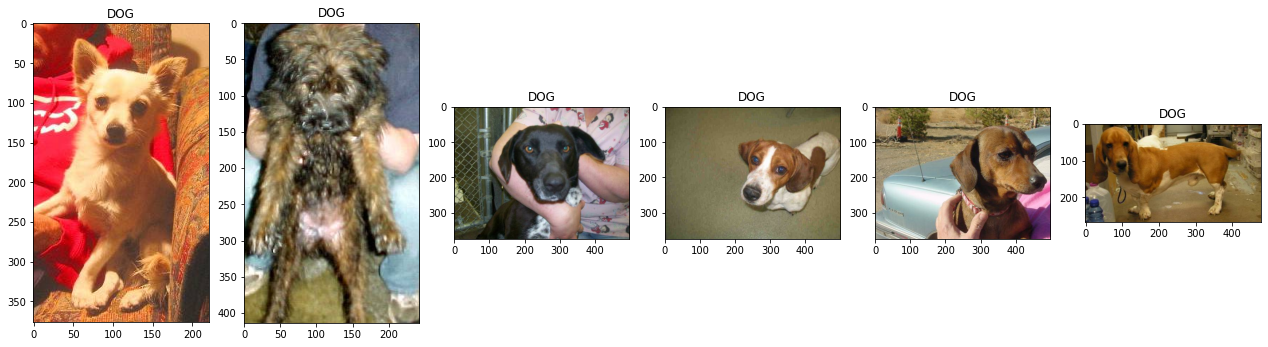

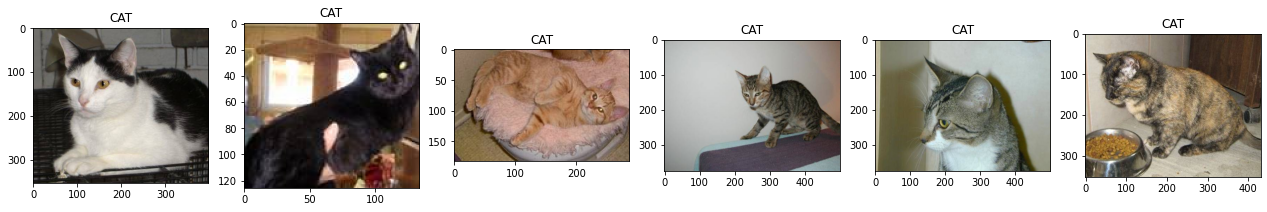

In [9]:
dog_image_list = data_df[data_df['label'] == 'DOG']['path'].iloc[:6].tolist()
cat_image_list = data_df[data_df['label'] == 'CAT']['path'].iloc[:6].tolist()

show_grid_images(dog_image_list, ncols=6, title='DOG')
show_grid_images(cat_image_list, ncols=6, title='CAT')

In [8]:
 for image_path in dog_image_list:
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        print(f'image shape: {image.shape}')
        
image[:, 0, 0].shape, image[0, :, 0].shape, image[:, :, 0].shape, image

image shape: (377, 221, 3)
image shape: (414, 242, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (375, 499, 3)
image shape: (267, 478, 3)


((267,),
 (478,),
 (267, 478),
 array([[[ 81,  65,  31],
         [ 81,  65,  31],
         [ 81,  65,  31],
         ...,
         [ 88,  46,  21],
         [ 85,  41,  14],
         [ 85,  39,  13]],
 
        [[ 81,  65,  31],
         [ 81,  65,  31],
         [ 81,  65,  31],
         ...,
         [ 77,  37,  11],
         [ 79,  35,  10],
         [ 80,  36,   9]],
 
        [[ 81,  65,  31],
         [ 81,  65,  31],
         [ 81,  65,  29],
         ...,
         [ 75,  38,  11],
         [ 79,  37,  12],
         [ 81,  39,  14]],
 
        ...,
 
        [[ 94,  95, 100],
         [ 67,  70,  77],
         [ 45,  49,  58],
         ...,
         [125,  97,  47],
         [126,  98,  48],
         [126,  98,  48]],
 
        [[ 68,  73,  79],
         [ 48,  52,  61],
         [ 32,  38,  50],
         ...,
         [125,  97,  47],
         [126,  98,  48],
         [126,  98,  48]],
 
        [[ 49,  56,  64],
         [ 33,  42,  51],
         [ 25,  33,  46],
         ..

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)

train_flow_gen = train_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/training_set/training_set', target_size=(224, 224), class_mode='categorical', batch_size=64)

Found 8005 images belonging to 2 classes.


In [12]:
images_array, labels_array = next(train_flow_gen)

images_array.shape, labels_array.shape, images_array, labels_array

((64, 224, 224, 3),
 (64, 2),
 array([[[[0.28627452, 0.29411766, 0.2509804 ],
          [0.08627451, 0.09019608, 0.05882353],
          [0.04313726, 0.04705883, 0.01568628],
          ...,
          [0.10588236, 0.10980393, 0.09019608],
          [0.10980393, 0.1137255 , 0.09411766],
          [0.10588236, 0.10980393, 0.09019608]],
 
         [[0.14117648, 0.14901961, 0.10588236],
          [0.03921569, 0.04313726, 0.01176471],
          [0.04705883, 0.0509804 , 0.01960784],
          ...,
          [0.10196079, 0.10588236, 0.08627451],
          [0.10588236, 0.10980393, 0.09019608],
          [0.10980393, 0.1137255 , 0.09411766]],
 
         [[0.33333334, 0.34117648, 0.29803923],
          [0.16078432, 0.16470589, 0.13333334],
          [0.05490196, 0.05882353, 0.02745098],
          ...,
          [0.10980393, 0.1137255 , 0.09411766],
          [0.09803922, 0.10196079, 0.08235294],
          [0.09803922, 0.10196079, 0.08235294]],
 
         ...,
 
         [[0.20392159, 0.18823531, 0

In [46]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 개와 고양이 2 종류이므로 Dense의 units는 2
    output = Dense(2, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model


In [15]:
model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

2022-09-22 00:25:49.440442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 00:25:49.558881: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 00:25:49.559689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-22 00:25:49.561366: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_____________________________

In [16]:
 model.fit(train_flow_gen, epochs=15)

2022-09-22 00:29:44.976059: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-09-22 00:29:50.745520: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


126/126 [==============================] - 107s 752ms/step - loss: 0.1276 - accuracy: 0.9487
Epoch 2/15
126/126 [==============================] - 93s 737ms/step - loss: 0.0607 - accuracy: 0.9798
Epoch 3/15
126/126 [==============================] - 93s 738ms/step - loss: 0.0481 - accuracy: 0.9840
Epoch 4/15
126/126 [==============================] - 93s 737ms/step - loss: 0.0443 - accuracy: 0.9834
Epoch 5/15
126/126 [==============================] - 93s 737ms/step - loss: 0.0311 - accuracy: 0.9901
Epoch 6/15
126/126 [==============================] - 93s 738ms/step - loss: 0.0368 - accuracy: 0.9884
Epoch 7/15
126/126 [==============================] - 94s 742ms/step - loss: 0.0229 - accuracy: 0.9921
Epoch 8/15
126/126 [==============================] - 93s 738ms/step - loss: 0.0338 - accuracy: 0.9896
Epoch 9/15
126/126 [==============================] - 93s 737ms/step - loss: 0.0228 - accuracy: 0.9911
Epoch 10/15
126/126 [==============================] - 93s 737ms/step - loss: 0.012

In [18]:
test_gen = ImageDataGenerator(rescale=1/255.)
test_flow_gen = test_gen.flow_from_directory(directory='/kaggle/input/cat-and-dog/test_set/test_set', target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='categorical', batch_size=BATCH_SIZE, shuffle=False)


Found 2023 images belonging to 2 classes.


In [19]:
model.evaluate(test_flow_gen)

32/32 [==============================] - 21s 639ms/step - loss: 0.1215 - accuracy: 0.9659


[0.12150198221206665, 0.9658922553062439]

In [43]:
train_df = data_df[data_df['dataset'] == 'train']
test_df = data_df[data_df['dataset'] == 'test']

train_df.shape, test_df.shape

((8005, 3), (2023, 3))

In [44]:
from sklearn.model_selection import train_test_split

tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['label'], random_state=2021)
tr_df.shape, val_df.shape, tr_df['label'].value_counts(), val_df['label'].value_counts()

((6804, 3),
 (1201, 3),
 DOG    3404
 CAT    3400
 Name: label, dtype: int64,
 DOG    601
 CAT    600
 Name: label, dtype: int64)

In [47]:
train_generator = ImageDataGenerator(horizontal_flip=True, rescale=1/255.)
valid_generator = ImageDataGenerator(rescale=1/255.)
test_generator = ImageDataGenerator(rescale=1/255.)

tr_flow_gen = train_generator.flow_from_dataframe(dataframe=tr_df, x_col='path', y_col='label', target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='binary', batch_size=BATCH_SIZE, shuffle=True)
val_flow_gen = valid_generator.flow_from_dataframe(dataframe=val_df, x_col='path', y_col='label', target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='binary', batch_size=BATCH_SIZE, shuffle=False)
test_flow_gen = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='binary', batch_size=BATCH_SIZE, shuffle=False)

Found 6804 validated image filenames belonging to 2 classes.
Found 1201 validated image filenames belonging to 2 classes.
Found 2023 validated image filenames belonging to 2 classes.


In [27]:
images_array, labels_array = next(tr_flow_gen)

images_array.shape, labels_array.shape

((64, 224, 224, 3), (64,))

In [28]:
images_array[0], labels_array[0]

(array([[[0.6117647 , 0.7843138 , 0.45098042],
         [0.62352943, 0.7960785 , 0.46274513],
         [0.67058825, 0.79215693, 0.48627454],
         ...,
         [0.3921569 , 0.5411765 , 0.24705884],
         [0.39607847, 0.54509807, 0.2509804 ],
         [0.4039216 , 0.5529412 , 0.25882354]],
 
        [[0.5647059 , 0.7294118 , 0.43921572],
         [0.63529414, 0.8000001 , 0.50980395],
         [0.6431373 , 0.7803922 , 0.4666667 ],
         ...,
         [0.34901962, 0.5058824 , 0.21960786],
         [0.34901962, 0.5058824 , 0.21960786],
         [0.35686275, 0.5137255 , 0.227451  ]],
 
        [[0.48235297, 0.6431373 , 0.38431376],
         [0.5254902 , 0.6862745 , 0.427451  ],
         [0.5686275 , 0.72156864, 0.4039216 ],
         ...,
         [0.31764707, 0.48235297, 0.19215688],
         [0.31764707, 0.48235297, 0.19215688],
         [0.3254902 , 0.4901961 , 0.20000002]],
 
        ...,
 
        [[0.5137255 , 0.64705884, 0.35686275],
         [0.49411768, 0.627451  , 0.33725

In [29]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu', name='fc1')(x)
    # 개와 고양이 2 종류이므로 Dense의 units는 2
    output = Dense(1, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model


In [30]:
model = create_model(model_name='xception')
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
N_EPOCHS = 15

model.fit(tr_flow_gen, epochs=N_EPOCHS, validation_data=val_flow_gen, callbacks=[rlr_cb, ely_cb])

Epoch 1/15
107/107 [==============================] - 85s 792ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0608 - val_accuracy: 0.9833
Epoch 2/15
107/107 [==============================] - 85s 796ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0636 - val_accuracy: 0.9833
Epoch 3/15
107/107 [==============================] - 85s 798ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0713 - val_accuracy: 0.9817
Epoch 4/15
107/107 [==============================] - 85s 790ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0805 - val_accuracy: 0.9833

Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
Epoch 5/15
 52/107 [=============>................] - ETA: 40s - loss: 0.0017 - accuracy: 0.9994

In [1]:
model.evaluate(test_flow_gen)

NameError: name 'model' is not defined

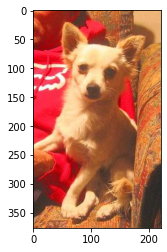

In [11]:
import cv2

image = cv2.cvtColor(cv2.imread(data_df['path'].iloc[0]), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [12]:
def preprocessing_scaling(x, mode='tf'):
    if mode == 'tf':
        x = x / 127.5
        x -= 1.
        
    elif mode == 'torch':
        x = x / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        for i in range(3):
            x[:, :, i] = (x[:, :, i] - mean[i]) / std[i]
    
    return x

In [13]:
scaled_image_tf = preprocessing_scaling(image, mode='tf')
scaled_image_torch = preprocessing_scaling(image, mode='torch')

In [18]:
image[:, :, 0].shape, image[:, :, 0].flatten().shape

((377, 221), (83317,))

In [35]:
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
    
    for i in range(3):
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        axs[i].legend(loc='upper right')
        if i == 0:
            title_str = 'Red'
        if i == 1:
            title_str = 'Green'
        if i == 2:
            title_str = 'Blue'            
        axs[i].set(title=title_str)

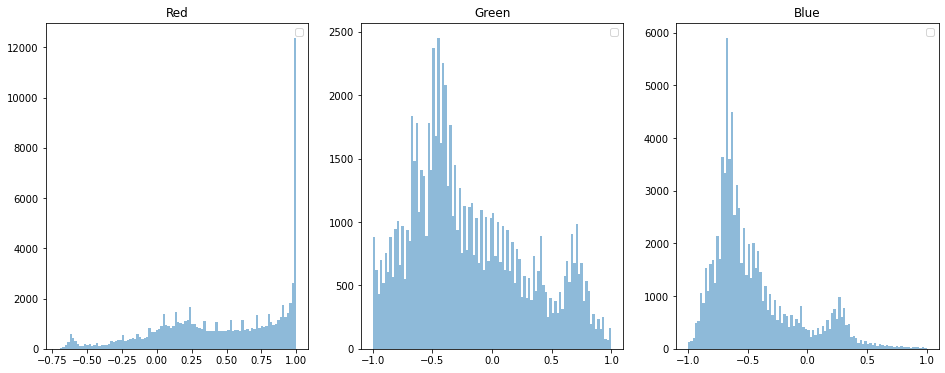

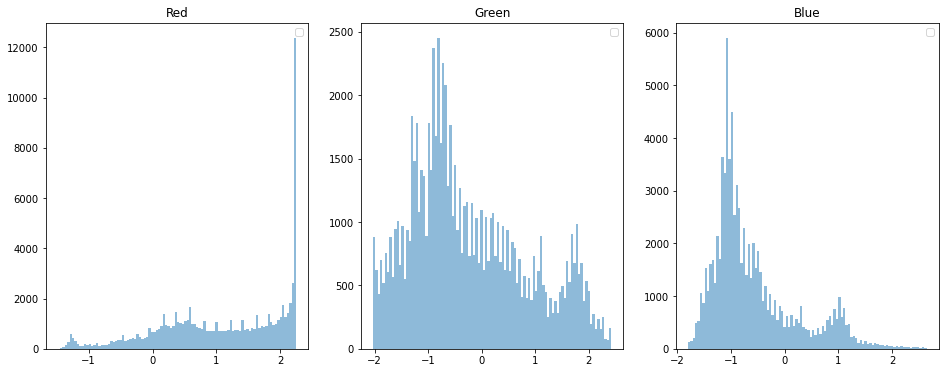

In [36]:
show_pixel_histogram(scaled_image_tf)
show_pixel_histogram(scaled_image_torch)

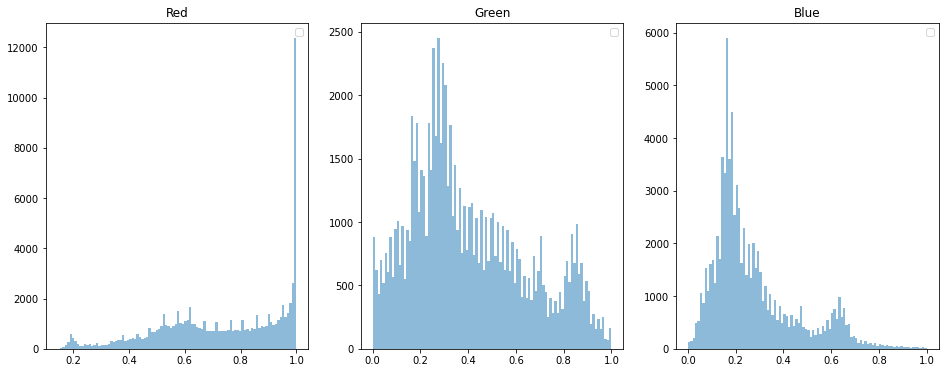

In [37]:
show_pixel_histogram(image/255.0)

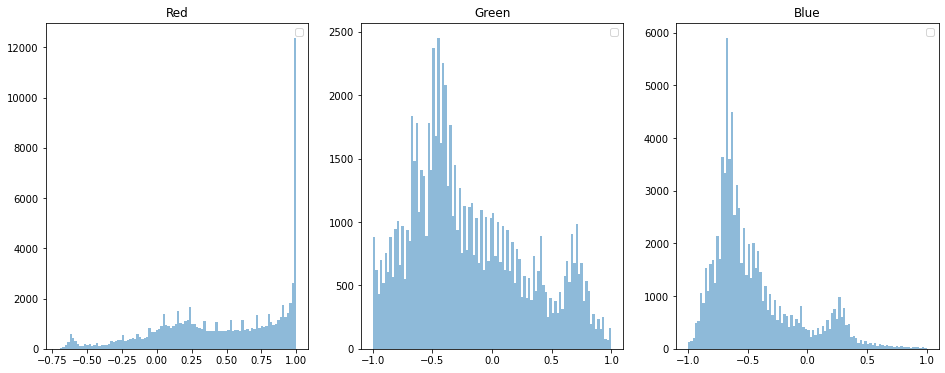

In [38]:
from tensorflow.keras.applications.xception import preprocess_input

scaled_image_xception = preprocess_input(image)
show_pixel_histogram(scaled_image_xception)

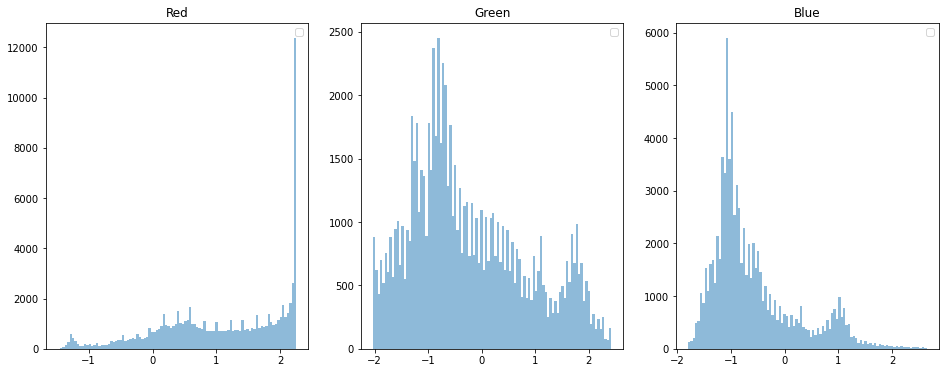

In [39]:
from tensorflow.keras.applications.densenet import preprocess_input

scaled_image_densenet = preprocess_input(image)
show_pixel_histogram(scaled_image_densenet)

In [50]:
from tensorflow.keras.applications.xception import preprocess_input

train_generator = ImageDataGenerator(horizontal_flip=True, preprocessing_function=preprocess_input)

tr_flow_gen = train_generator.flow_from_dataframe(dataframe=tr_df, x_col='path', y_col='label', target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='binary', batch_size=BATCH_SIZE, shuffle=True)

Found 6804 validated image filenames belonging to 2 classes.


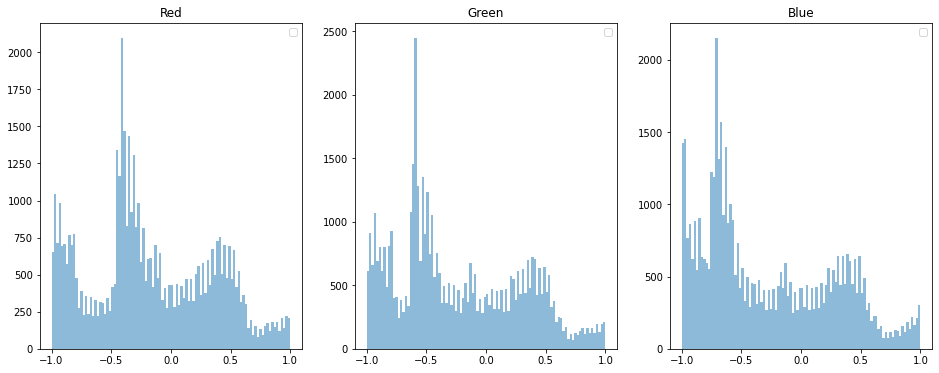

In [51]:
images_array, labels_array = next(tr_flow_gen)

show_pixel_histogram(images_array[0])